# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
record = 0
sets = 1

# create empty lists to hold data
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

# gather weather data for cities
for index, city in enumerate(cities):
    
    # set query url to generate json response for cities
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        
        # new set when record hits 50
        if record == 50:
            record = 0
            sets = sets + 1
        
        # append record counter
        else:
            record = record + 1
        
        # print out data
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except:
        print("City not found. Skipping to next available city.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | sao felix do xingu
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | uvat
Processing Record 11 of Set 1 | mayo
Processing Record 12 of Set 1 | ambon
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | beloha
Processing Record 16 of Set 1 | westport
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | hobart
City not found. Skipping to next available city.
Processing Record 19 of Set 1 | aswan
Processing Record 20 of Set 1 | boende
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | puerto quijarro
Pr

Processing Record 29 of Set 4 | baft
Processing Record 30 of Set 4 | port elizabeth
Processing Record 31 of Set 4 | arlit
Processing Record 32 of Set 4 | peniche
Processing Record 33 of Set 4 | willowmore
Processing Record 34 of Set 4 | kaeo
Processing Record 35 of Set 4 | egvekinot
Processing Record 36 of Set 4 | junagarh
Processing Record 37 of Set 4 | buchanan
Processing Record 38 of Set 4 | pahrump
Processing Record 39 of Set 4 | la rochelle
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 4 | nhulunbuy
Processing Record 44 of Set 4 | vangaindrano
Processing Record 45 of Set 4 | itaituba
Processing Record 46 of Set 4 | zeya
Processing Record 47 of Set 4 | ceska kamenice
Processing Record 48 of Set 4 | chengde
Processing Record 49 of Set 4 | port hardy
Processing Record 50 of Set 4 | radom
Processing Record 0 of Set 5 | mar del plata
Processing Record 1 of Set 5 | 

Processing Record 1 of Set 8 | heishan
Processing Record 2 of Set 8 | blama
Processing Record 3 of Set 8 | senador jose porfirio
Processing Record 4 of Set 8 | guarapari
Processing Record 5 of Set 8 | fairbanks
City not found. Skipping to next available city.
Processing Record 6 of Set 8 | souillac
Processing Record 7 of Set 8 | hearst
Processing Record 8 of Set 8 | monte alegre
Processing Record 9 of Set 8 | balkhash
Processing Record 10 of Set 8 | hithadhoo
Processing Record 11 of Set 8 | puerto ayacucho
City not found. Skipping to next available city.
Processing Record 12 of Set 8 | mweka
Processing Record 13 of Set 8 | biltine
City not found. Skipping to next available city.
Processing Record 14 of Set 8 | acapulco
Processing Record 15 of Set 8 | hirara
Processing Record 16 of Set 8 | sao joao da barra
Processing Record 17 of Set 8 | lerwick
Processing Record 18 of Set 8 | constitucion
City not found. Skipping to next available city.
Processing Record 19 of Set 8 | praia da vitoria

Processing Record 26 of Set 11 | tateyama
Processing Record 27 of Set 11 | qaqortoq
Processing Record 28 of Set 11 | birao
Processing Record 29 of Set 11 | san jeronimo
Processing Record 30 of Set 11 | padre bernardo
Processing Record 31 of Set 11 | katobu
Processing Record 32 of Set 11 | leesburg
Processing Record 33 of Set 11 | salinopolis
Processing Record 34 of Set 11 | nuevo progreso
Processing Record 35 of Set 11 | mastic beach
Processing Record 36 of Set 11 | walbrzych
Processing Record 37 of Set 11 | te anau
Processing Record 38 of Set 11 | detchino
Processing Record 39 of Set 11 | haradok
Processing Record 40 of Set 11 | bundaberg
Processing Record 41 of Set 11 | batemans bay
Processing Record 42 of Set 11 | kondinskoye
Processing Record 43 of Set 11 | saldanha
Processing Record 44 of Set 11 | skibbereen
Processing Record 45 of Set 11 | coolum beach
Processing Record 46 of Set 11 | makubetsu
Processing Record 47 of Set 11 | pionki
Processing Record 48 of Set 11 | kijang
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": maxtemp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
})


# show header rows
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,39.36,87,76,9.31,GL,1663043275
1,Beringovskiy,63.0500,179.3167,44.96,81,98,17.45,RU,1663043276
2,Kapaa,22.0752,-159.3190,82.38,76,20,10.36,US,1663043277
3,Butaritari,3.0707,172.7902,81.16,77,10,9.37,KI,1663043278
4,Khatanga,71.9667,102.5000,39.18,72,99,9.91,RU,1663043278


In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,19.283093,16.120632,66.472526,73.100683,56.723549,7.831195,1.663043e+09
std,32.577187,90.076671,14.277279,19.549152,38.916593,5.637293,1.514085e+02
min,-54.800000,-179.166700,31.840000,12.000000,0.000000,0.000000,1.663043e+09
25%,-7.742125,-63.509000,54.985000,63.000000,19.250000,3.760000,1.663043e+09
50%,22.824600,20.677100,69.230000,77.000000,69.000000,6.780000,1.663044e+09
75%,46.682700,92.472975,78.007500,88.000000,98.000000,10.360000,1.663044e+09
max,78.218600,179.316700,101.860000,100.000000,100.000000,31.230000,1.663044e+09


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

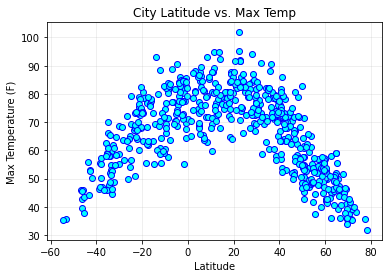

In [8]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/lat_vs_temp_plot.png")

## Latitude vs. Humidity Plot

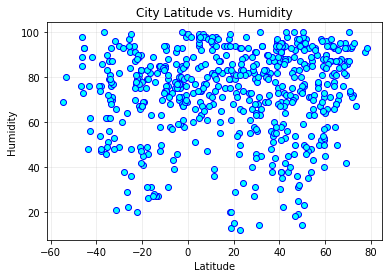

In [9]:
plt.scatter(city_df["Lat"], city_df["Humidity"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/lat_vs_Humidity_plot.png")

## Latitude vs. Cloudiness Plot

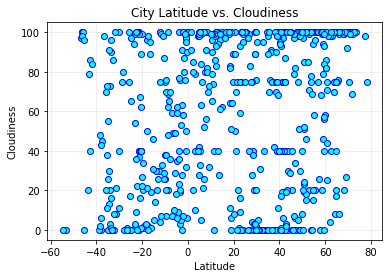

In [10]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/lat_vs_cloudiness_plot.png")

## Latitude vs. Wind Speed Plot

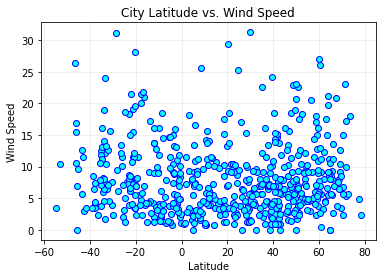

In [11]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/lat_vs_Wind_Speed_plot.png")

## Linear Regression

In [12]:
n_hem = city_df.loc[city_df["Lat"] >= 0, :]
s_hem = city_df.loc[city_df["Lat"] < 0, :]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6418318003032712
As cities in the northern hemisphere move closer to the north pole and farther from the equator, temperatures drop.
This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.


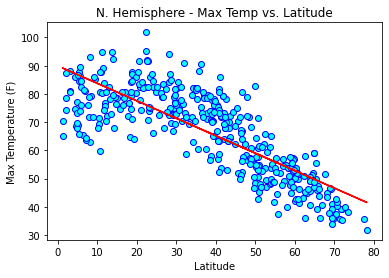

In [13]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("As cities in the northern hemisphere move closer to the north pole and farther from the equator, temperatures drop.")
print("This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.")
plt.savefig("../output_data/nhem_temp_v_lat_plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5998303450548377
As some cities in the southern hemisphere move closer to the equator, temperatures rise.
This proves a slight positive correlation between latitude and temperature in the southern hemisphere.


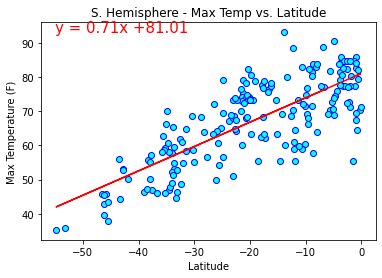

In [14]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("As some cities in the southern hemisphere move closer to the equator, temperatures rise.")
print("This proves a slight positive correlation between latitude and temperature in the southern hemisphere.")
plt.savefig("../output_data/shem_temp_v_lat_plot.png")

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00031300915757120364
There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.


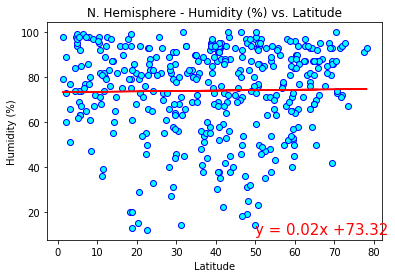

In [15]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.")

plt.savefig("../output_data/nhem_humidity_v_lat_plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0019360248938404935
There is a little correlation between humidity and latitude for cities in the southern hemisphere.


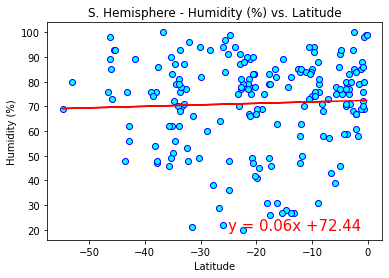

In [16]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between humidity and latitude for cities in the southern hemisphere.")
plt.savefig("../output_data/shem_humidity_v_lat_plot.png")

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.004862096751351625
There is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.


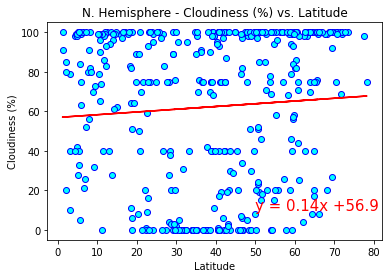

In [17]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.")

plt.savefig("../output_data/nhem_cloudiness_v_lat_plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006856742589325783
There is a little correlation between cloudiness and latitude for cities in the southern hemisphere.


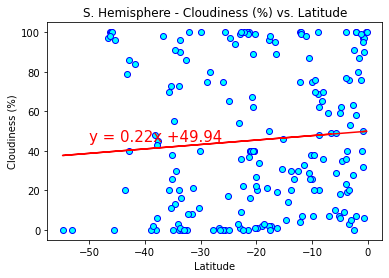

In [18]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between cloudiness and latitude for cities in the southern hemisphere.")

plt.savefig("../output_data/shem_cloudiness_v_lat_plot.png")

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.019994234793783528
There is a little correlation between wind speed and latitude for cities in the northern hemisphere.


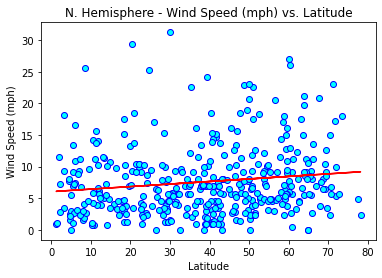

In [19]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between wind speed and latitude for cities in the northern hemisphere.")

plt.savefig("../output_data/nhem_wind_v_lat_plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.028993859285373534
There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.


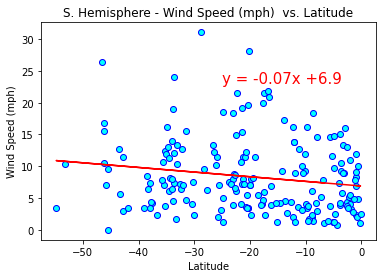

In [20]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Wind Speed (mph)  vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,23),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.")

plt.savefig("../output_data/shem_wind_v_lat_plot.png")